# 1. Подготовка данных

## 1.1 Анализ входных данных

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('/datasets/autos.csv')
print(data.info())
print(data.describe())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB
None
               Price  RegistrationYear          Power      Kilometer  \
count  354369.000000     354369.000000  354369.000000  354369.00

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


Нужно изменить тип у столбцов:DateCreated, NotRepaired. 

Удалить столбцы: DateCrawled, LastSeen, PostalCode, NumberOfPictures, RegistrationMonth. 

В столбце NotRepaired заменю Nan на 0.
Во всех категориальных столбцах Nan заменю на not_specified, удалю строки, в которых слишком много (это число определю) пропущенных значений.

DateCreated нужно разделить на 2: год и месяц.

## 1.2 Выполнение задач из предыдущего пункта.

### UPDATE эта ячейка появилась после анализа features_importance

In [6]:
data['DateCreated'] = pd.to_datetime(data['DateCreated'])
data['LastSeen'] = pd.to_datetime(data['LastSeen'])
data['activities'] = data['LastSeen'] - data['DateCreated']
print(data['activities'])
data['activities'] = pd.to_datetime(data['activities']).dt.day + (pd.to_datetime(data['activities']).dt.month-1)*30 #видимо были нулевые дни, из за этого 
data['activities']# 0-й элемент, который был 14 дней стал 15-м, но думаю это не так важно

0        14 days 03:16:57
1        14 days 01:46:50
2        22 days 12:47:46
3         0 days 17:40:17
4         6 days 10:17:21
               ...       
354364    0 days 10:42:49
354365   23 days 00:46:52
354366    6 days 18:17:12
354367   19 days 07:15:26
354368    4 days 12:45:21
Name: activities, Length: 354369, dtype: timedelta64[ns]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  """


0         15
1         15
2         23
3          1
4          7
          ..
354364     1
354365    24
354366     7
354367    20
354368     5
Name: activities, Length: 354369, dtype: int64

In [7]:
data = data.drop(['DateCrawled', 'LastSeen'], axis=1)
data['DateCreated'] = pd.to_datetime(data['DateCreated'])
data['Year_created'], data['Month_created'] = data['DateCreated'].dt.year.astype('int64'), data['DateCreated'].dt.month.astype('int64')
data = data.drop('DateCreated', axis=1)
data['NotRepaired'] = data['NotRepaired'].map({'yes':1, 'no':0})
data['NotRepaired'] = data['NotRepaired'].fillna(1).astype('bool')
data = data.drop(['NumberOfPictures', 'PostalCode'], axis=1)
categorical_columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
data = data.drop_duplicates()
data

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,activities,Year_created,Month_created
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,True,15,2016,3
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,True,15,2016,3
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,True,23,2016,3
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,False,1,2016,3
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,False,7,2016,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,True,1,2016,3
354365,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,True,24,2016,3
354366,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,False,7,2016,3
354367,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,False,20,2016,3


### <span style="color:red">Насчет года: Year_created не вносил никакого вклада в обучение, поэтому я его удалил (ниже). Удаление Month_created несколько ухудшало качество прогнозирования. </span>
    
Вообще на данном этапе я отбирал признаки для обучения скорее руководствуясь здравым смыслом. Вполне логичным казалось, что более старые предложения должны со быть более дешевыми.

Конечно, в некотором смысле время продажи автомобиля может отождествляться с признаком activities: если промежуток между датой регистрации и датой последней активности велик -- очевидно, машина продается не очень хорошо и логично ожидать более низкой цены. Но это работает не всегда. Вполне адекватен следующий вариант: продавец создал объявление, за условные три месяца предложений не поступило, он зашел в аккаунт, снизил цену, и условно еще три месяца не заходил. Промежуток activities относительно небольшой, но машина продается долго. 
    
Эта неоднозначность могла бы быть исправлена при взаимодействии с заказчиком, но в данной ситуации я предпочел оставить все как есть, и просто посмотреть что дальше будет. И, возвращаясь к первому абзацу, Month_created вносил небольшой, но все же вполне заметный вклад.


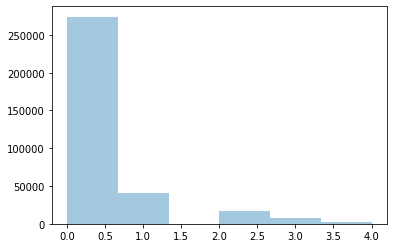

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1)
sns.distplot(data[categorical_columns].isna().sum(axis=1), kde=False, bins=6, ax=axs)

Удалять ничего не буду, сделаю отдельную категорию not_specified, как уже и говорил.

In [10]:
data[categorical_columns] = data[categorical_columns].fillna('not_specified')

### Вывод
Могу приступать к дальнейшей работе, пропусков и "плохих" данных тут нет.

# 1.3 Ликвидация выбросов

In [11]:
anomalies_data_check = data[set(data.columns)-set(categorical_columns)]
print('max', anomalies_data_check.max(), 'min', anomalies_data_check.min(), sep='\n')
anomalies_data_check = data[(set(data.columns)-set(categorical_columns))-set(['DateCreated','LastSeen', 'DateCrawled'])]

max
Kilometer            150000
Month_created            12
Price                 20000
Year_created           2016
Power                 20000
RegistrationYear       9999
activities              290
RegistrationMonth        12
dtype: int64
min
Kilometer            5000
Month_created           1
Price                   0
Year_created         2014
Power                   0
RegistrationYear     1000
activities              1
RegistrationMonth       0
dtype: int64


1 : 10297
51 : 12237
101 : 13814
151 : 15985
201 : 18850
251 : 21537
301 : 25186
351 : 28111
401 : 31662
451 : 34006
501 : 40747


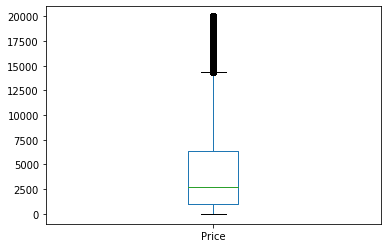

In [12]:
data['Price'].plot(kind='box')
for i in range(1, 502, 50):
    print(i, ':', data[data['Price']<i]['Price'].count())

В столбцах с типом datetime64 все хорошо, исключу их из рассмотрения. Во всех остальных столбцах есть выбросы, удалю их. В столбцах Price и Power, RegistrationYear воспользуюсь стандартным отклонением. Со столбцом Kilometer ничего делать не буду.

In [13]:
data['Price'] = data[(data['Price']>=300)]['Price']
print(data.dropna().shape)

(319846, 14)


In [14]:
data['Power'] = data[(data['Power']>=20) & (data['Power']<data['Power'].quantile(0.99))]['Power']
print(data.dropna().shape)

(285427, 14)


In [15]:
data['RegistrationYear'] = data[(
    (data['RegistrationYear']>=data['RegistrationYear'].quantile(0.01))
    &(data['RegistrationYear']<=data['RegistrationYear'].quantile(0.99)))]['RegistrationYear']
print(data.dropna().shape)
data.describe()

(283399, 14)


,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,activities,Year_created,Month_created
count,319846.000000,338837.000000,299736.000000,342357.000000,342357.000000,342357.000000,342357.000000,342357.000000
mean,4705.341399,2003.398168,117.642919,128239.250256,5.698975,9.774674,2015.999927,3.160707
std,4517.107866,6.637032,48.397320,37901.612811,3.727167,8.493158,0.008880,0.376397
min,300.000000,1980.000000,20.000000,5000.000000,0.000000,1.000000,2014.000000,1.000000
25%,1300.000000,1999.000000,75.000000,125000.000000,3.000000,3.000000,2016.000000,3.000000
50%,2999.000000,2003.000000,110.000000,150000.000000,6.000000,7.000000,2016.000000,3.000000
75%,6750.000000,2008.000000,145.000000,150000.000000,9.000000,15.000000,2016.000000,3.000000
max,20000.000000,2018.000000,299.000000,150000.000000,12.000000,290.000000,2016.000000,12.000000


In [16]:
data = data[data['Price'].isna()==False]
data['Power'] = data['Power'].fillna(data['Power'].median())
data = data.dropna()
data.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(316817, 14)

## Вывод
Кажется, на этом все. Пропущенные значения удалять не буду (удалил только из таргета). Буду пробовать обучать модель сперва на данных с пропусками, если результат будет слишком плохой, удалю вообще все пропуски.
Если есть предложения по поводу введения верхней границы для Price, или изменения нижней для Power, или нечто аналогичное, буду рад услышать обоснование.


# 2. Обучение моделей

In [17]:
categorical_features = ['Gearbox',  'Model', 'Brand', 'FuelType', 'VehicleType', 'NotRepaired']#, 'Year_created', 'Month_created' 'RegistrationYear', 'RegistrationMonth','Power',]

### Обучаю случайный лес

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
data_regression = data.copy()

data_regression[categorical_features] = data_regression[categorical_features].astype('category')

encoder = OrdinalEncoder()
encoder.fit(data_regression[categorical_features]) ### лишняя строка
data_regression[categorical_features] = encoder.fit_transform(data_regression[categorical_features])

data_regression = data_regression.dropna()
features = data_regression.drop('Price', axis=1)
target = data_regression['Price']

sc = StandardScaler()
features[list(set(features.columns) - set(categorical_features))] = sc.fit_transform(features[list(set(features.columns) - set(categorical_features))])

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=0)
model_forest = RandomForestRegressor()

params = {
    'bootstrap': [True],
    'criterion': ['mse'],
    'max_depth': [6],
    'max_features': ['auto'],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0],
    'min_impurity_split': [None],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'min_weight_fraction_leaf': [0.0],
    'n_estimators': [78],
    'n_jobs': [None],
    'oob_score': [False],
    'random_state': [0],
    'verbose': [1],
    'warm_start': [False]
}

grid_cv = GridSearchCV(model_forest, params, scoring='neg_mean_squared_error', cv = 2)

In [28]:
%%time
grid_cv.fit(features_train, target_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:   11.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:   11.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 50.5 s, sys: 23.4 ms, total: 50.5 s
Wall time: 50.6 s


[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:   25.7s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=Non...
                         'min_impurity_decrease': [0.0],
                         'min_impurity_split': [None], 'min_samples_leaf': [1],
                         'min_s

In [29]:
print(grid_cv.best_estimator_)
abs(grid_cv.best_score_)**0.5

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=78,
                      n_jobs=None, oob_score=False, random_state=0, verbose=1,
                      warm_start=False)


2349.643570464379

In [31]:
%%time
model_forest = grid_cv.best_estimator_
model_forest.fit(features_train, target_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 25.8 s, sys: 0 ns, total: 25.8 s
Wall time: 26 s


[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:   25.9s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=78,
                      n_jobs=None, oob_score=False, random_state=0, verbose=1,
                      warm_start=False)

In [32]:
%%time
prediction = model_forest.predict(features_test)
mean_squared_error(target_test, prediction)**0.5

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


CPU times: user 368 ms, sys: 0 ns, total: 368 ms
Wall time: 384 ms


[Parallel(n_jobs=1)]: Done  78 out of  78 | elapsed:    0.4s finished


2348.070762030704

## LGB REGRESSION

In [184]:
data_lgb = data.copy()
print(data_lgb.columns)
data_lgb = data_lgb.drop('Year_created', axis=1)

inx = pd.Series(data_lgb.columns.isin(categorical_features))
categorical_features_inx = inx[inx].index

data_lgb[categorical_features] = data_lgb[categorical_features].astype('category')
features = data_lgb.drop('Price', axis=1)
target = data_lgb['Price']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=0)
categorical_features_inx

Index(['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model',
       'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand', 'NotRepaired',
       'activities', 'Year_created', 'Month_created'],
      dtype='object')


Int64Index([1, 3, 5, 8, 9, 10], dtype='int64')

In [185]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
model_lgb = lgb.LGBMRegressor()
model_lgb.fit(features_train, target_train)
prediction = model_lgb.predict(features_test)

mean_squared_error(target_test, prediction)**0.5

1634.319148908653

In [186]:
params_lgb = {
    'max_depth' : [8], 
    'num_leaves' : [256],
    'learning_rate' :[0.0889],
    'num_iterations' : [300],
    'max_bin': [300],
    'lambda_l1' : [0.07500000000000001],
    'lambda_l2' : [0.07500000000000001]
}

grid_cv_lgb = GridSearchCV(model_lgb, params_lgb, scoring='neg_mean_squared_error', cv = 2)

In [187]:
%%time
grid_cv_lgb.fit(features_train, target_train)

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


CPU times: user 2min 57s, sys: 115 ms, total: 2min 57s
Wall time: 2min 59s


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda...
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={'lambda_l1': [0.07500000000000001],
                         'lambda_l2': [0.07500000000000001],
                         'learning_rate': [0.0889], 'max_bin': 

In [188]:
print(grid_cv_lgb.best_estimator_)
abs(grid_cv_lgb.best_score_)**0.5


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', lambda_l1=0.07500000000000001,
              lambda_l2=0.07500000000000001, learning_rate=0.0889, max_bin=300,
              max_depth=8, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1,
              num_iterations=300, num_leaves=256, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


1587.2852288988909

CPU times: user 1min 1s, sys: 296 ms, total: 1min 1s
Wall time: 1min 2s


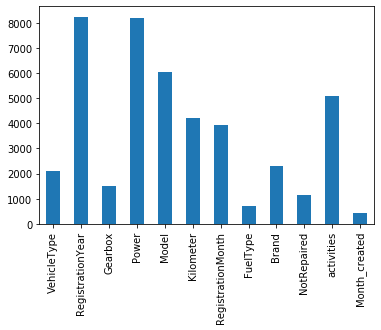

In [189]:
%%time
model_lgb_final = grid_cv_lgb.best_estimator_#lgb.LGBMRegressor(params)
model_lgb_final.fit(features_train, target_train)
feat_importance = pd.Series(model_lgb_final.feature_importances_, index = features_train.columns)
feat_importance.plot(kind='bar', sort_columns=True)

In [190]:
%%time
prediction = model_lgb_final.predict(features_test)

CPU times: user 8.8 s, sys: 0 ns, total: 8.8 s
Wall time: 8.76 s


In [191]:
from sklearn.metrics import mean_squared_error
mean_squared_error(target_test, prediction)**0.5

1544.9469515289222

## CatBoost

In [131]:
data_cat = data.copy()
data_cat= data_cat.drop('Year_created', axis=1)

In [157]:
from catboost import Pool, CatBoostRegressor
inx = pd.Series(data_cat.columns.isin(categorical_features))
categorical_features_inx = inx[inx].index

data_cat[categorical_features] = data_cat[categorical_features].astype('category')
features = data_cat.drop('Price', axis=1)
target = data_cat['Price']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=0)

train_pool = Pool(features_train, 
                  target_train, cat_features=pd.Series(categorical_features_inx)-1)
test_pool = Pool(features_test, 
                 cat_features=pd.Series(categorical_features_inx)-1)
"""
model = CatBoostRegressor(iterations=1000, 
                          depth=8,  
                          loss_function='RMSE')
model.fit(train_pool)
predictions = model.predict(test_pool)
mean_squared_error(target_test, predictions)**0.5"""

"\nmodel = CatBoostRegressor(iterations=1000, \n                          depth=8,  \n                          loss_function='RMSE')\nmodel.fit(train_pool)\npredictions = model.predict(test_pool)\nmean_squared_error(target_test, predictions)**0.5"

In [164]:
model_cat = CatBoostRegressor()
params_cat = {
    'iterations' : [500, 1000],
    'depth' : [5, 8]
    #'loss_function' : ['RMSE']#,
    #'cat_features': list(pd.Series(categorical_features_inx)-1)
}
model_cat_search_result = model_cat.grid_search(param_grid=params_cat, 
                                       X=train_pool, cv=2,
                                       plot=False)

0:	loss: 1806.4789480	best: 1806.4789480 (0)	total: 4m 23s	remaining: 13m 10s
1:	loss: 1720.7595197	best: 1720.7595197 (1)	total: 13m 10s	remaining: 13m 10s
2:	loss: 1685.6031402	best: 1685.6031402 (2)	total: 20m 39s	remaining: 6m 53s
3:	loss: 1628.4239591	best: 1628.4239591 (3)	total: 35m 58s	remaining: 0us
Estimating final quality...


In [170]:
model_cat_search_result['params']

{'depth': 8, 'iterations': 1000}

In [173]:
%%time
model_cat_final = CatBoostRegressor(depth=8, iterations=1000, verbose=False)
model_cat_final.fit(train_pool)

CPU times: user 15min 11s, sys: 1min 53s, total: 17min 4s
Wall time: 17min 7s


In [174]:
%%time
predictions = model_cat_final.predict(test_pool)
mean_squared_error(target_test, predictions)**0.5

CPU times: user 975 ms, sys: 61.2 ms, total: 1.04 s
Wall time: 1.01 s


1610.6277304350472

# 3. Анализ моделей

In [193]:
pd.DataFrame({'RMSE cross-validation' : [2427.6, 1587.3, 1628.4], 
              'RMSE test' : [2427.0, 1544.9, 1610.6],
              'fitting time' : ['23.5s', '1m2s', '17min7s'],
              'time of prediction' : ['358ms', '8.76s', '1.01s']
             }, index=['RandomForestRegressor', 'lightGBMRegressor', 'CatBoostRegressor'])

,RMSE cross-validation,RMSE test,fitting time,time of prediction
RandomForestRegressor,2427.6,2427.0,23.5s,358ms
lightGBMRegressor,1587.3,1544.9,1m2s,8.76s
CatBoostRegressor,1628.4,1610.6,17min7s,1.01s


# Вывод
Очевидно, что случайный лес справляется с задачей прогнозирования лучше.
На настройку леса (черновой подбор параметров + время на чтение документации по GridSearchCV (так получилось, что ранее не работал с такими инструментами)) я потратил менее часа. На подбор гиперпараметров LightGBM я потратил часов 6 (такой же черновой вариант). Лучшая модель обучается за 44.5 секунд, и лучше стандартной всего на 86 пунктов (не знаю, в какой валюте выражена цена). На обучение CatBoost'а я потратил меньше всего времени, но главное это не время настройки (15 минут, да, неплохо), а то что показатели CatBoost'а аналогичны показателю LightGBM, и в каждом из этих неудачных случаев использовался алгоритм бустинга.

#### Вывод по выводу: 
На мой взгляд, потратить часов 5-6 на обучение хорошей модели, решающей бизнес-задачу с высокой точностью вполне приемлемо. Поэтому как бы я действовал дальше в условиях реального проекта (при условии что я не знаю никакой новой информации о каких-то других инструментах): запустил бы детальный и широкий подбор гиперпараметров для леса.  